## Optimization

A usual optimization problem is
\begin{gather*}
\min_{x\in\mathbb{R}^n} f(x) \\
\text{s.t.} \quad g_i(x) = 0 \\
\qquad h_j(x) \leq 0
\end{gather*}
for $f,g_i,h_j:\mathbb{R}^n\to\mathbb{R}$.

Every maximization problem can be written as a minimization problem since 
$$ \argmin f = \argmax -f$$

There are 3 classes of optimization methods:

1. Comparison methods: no derivatives required (e.g., *brute force search*)

2. Methods using gradients: $C^1$ required

3. Methods using gradients and Hessian: $C^2$ required

Algorithms for solving unconstrained optimization problems with $n=1$:

1. Golden Section method

2. Brent's method

To solve constrained optimization problems with $n=1$ it is usually best to handle equality constraints through direct substitution (unconstrained problem). 

Algorithms for solving unconstrained optimization problems with $n>1$:

1. BFGS method

2. Newton-CG method

Algorithms for solving constrained optimization problems with $n>1$:

1. Nelder-Mead method

2. L-BFGS-B method

In [1]:
import numpy as np
import numba
from scipy import optimize
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size' : 20, 'lines.linewidth' : 3.5, 'figure.figsize' : (13,7)})

### 1. Golden Section method

Let's consider the function below and three points satisfying

- $a<b<c$

- $f(b)\leq f(a)$ and $f(b)\leq f(c)$

Then, if $f$ is a $C^0$ function, it must have a minimum in $[a,c]$. Then $a,b,c$ are said to bracket a minimum

In [2]:
def f(x):
    return 2 + np.cos(x) + np.cos(2*x-1/2)/(1.5)

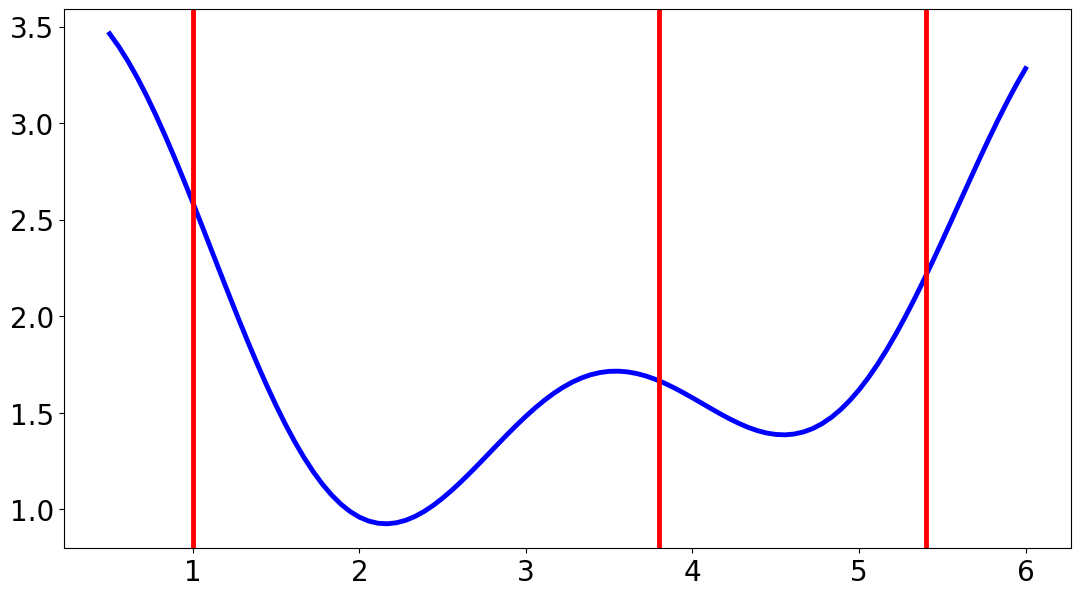

In [3]:
xpoints = np.linspace(0.5, 6, 100)

fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=1, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=3.8, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=5.4, ymin=0, ymax=3, c='red', ls='-');

To find the minimum, we need to shrink the bracket $a,b,c$. Suppose we chose $d=(a+c)/2$. 

- If $f(d)<f(b)$, then the new bracket is $a,d,b$

- If $f(d)>f(b)$, then the new bracket is $d,b,c$

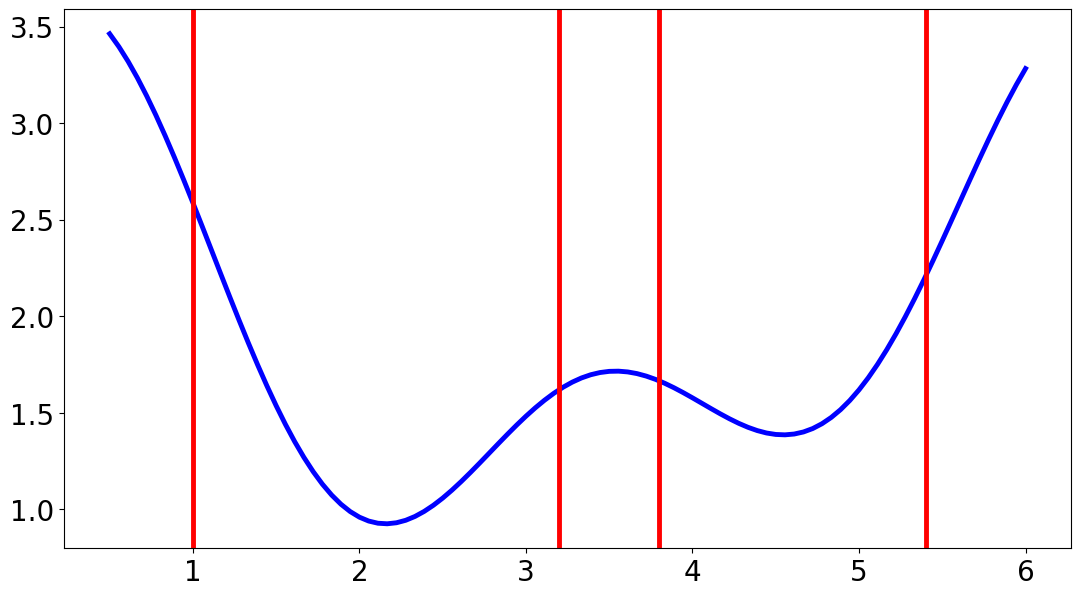

In [4]:
fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=1, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=3.8, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=3.2, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=5.4, ymin=0, ymax=3, c='red', ls='-');

**How to choose $d$?** 

The conservative approach is to *minimize the worst-case error*
- If $d<b$, then the possible brackets are $(a,d,b)$ and $(d,b,c)$ with worst-case error $\max\{b-a,c-d\}$. This error is minimized by a $d$ such that $b-a=c-d$ or $d=a+(c-b)$
- If $d>b$, then the possible brackets are $(a,b,d)$ and $(b,d,c)$ with worst-case error $\max\{d-a,c-b\}$. This error is minimized by a $d$ such that $d-a=c-b$ or $d=a+(c-b)$
- Since these two cases agree, $d$ should always be $a+(c-b)$

The selection of $d^*=a+(c-b)$ is called *golden-section search*
- If you begin with an arbitrary bracket ($b$ cannot be the midpoint of $a,c$), and then use $d^*=a+(c-b)$, you will eventually converge to smaller or "golden" intervals.

In [5]:
optimize.minimize_scalar(f, bracket=(1, 2.5, 3), method='golden')

     fun: 0.9252466217915462
    nfev: 42
     nit: 37
 success: True
       x: 2.157967317063834

In [6]:
optimize.minimize_scalar(f, bracket=(4, 4.5, 6), method='golden')

     fun: 1.3858288908190417
    nfev: 40
     nit: 35
 success: True
       x: 4.546109767773054

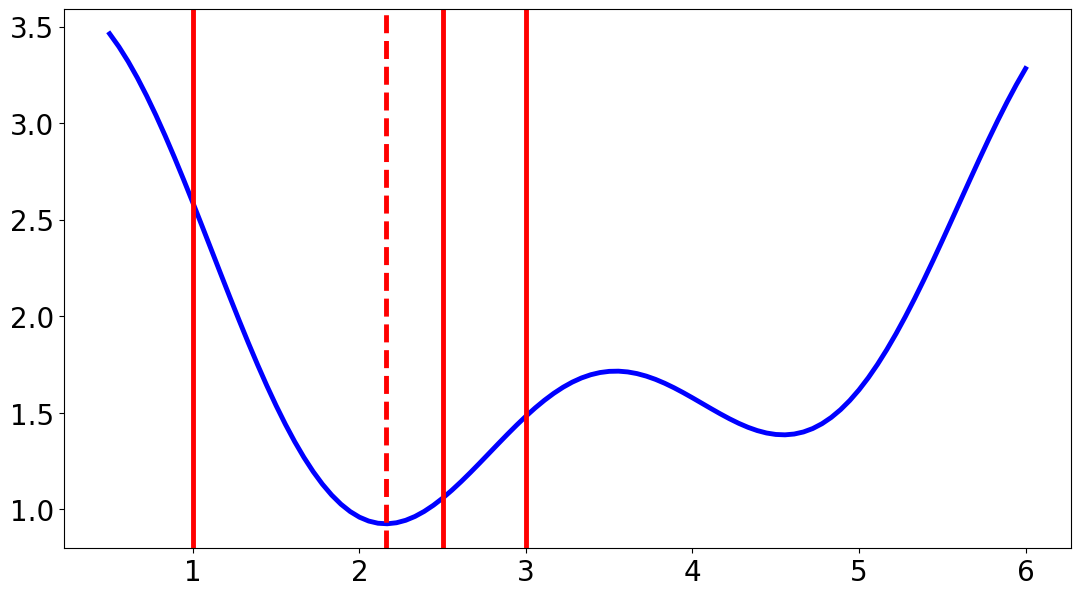

In [7]:
res = optimize.minimize_scalar(f, bracket=(1, 2.5, 3), method='golden')

fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=res.x, ymin=0, ymax=3, c='red', ls='--')
ax.axvline(x=1, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=2.5, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=3, ymin=0, ymax=3, c='red', ls='-');

**Advantages**
- Always finds a local minimum of any $C^0$ function
- If the function is unimodal, it finds the global minimum
- Designed to handle ill-behaved functions

**Disadvantages**
- Unnecesarily slow for well-behaved functions
- Have to find the initial bracket

### 2. Brent's method

- Golden section search chose intervals to minimize the worst-case behavior (unnecesarily conservative)

- Brent's method: the minimization and root-finding algorithms have many similarities such as parabolic interpolation

Overview:
- Finds an approximate local minimum of $f$ in an interval $[a,b]$, but never evaluates at $a$ or $b$

- After finding the bracket, the algorithm uses the $\argmin$ of an interpolating parabola as new trail point

- If the trial point does not meet certain criteria conditions (e.g., shrinking the bracket enough), a golden section step is performed

- The parabolic step tales advantage of well-behaved function properties [see figure](https://www.researchgate.net/figure/This-gure-shows-an-example-optimization-using-Brents-method-In-this-example-a_fig7_2821263)

In [8]:
optimize.minimize_scalar(f, method='brent')

     fun: 0.9252466217915462
    nfev: 17
     nit: 12
 success: True
       x: 2.157967326134264

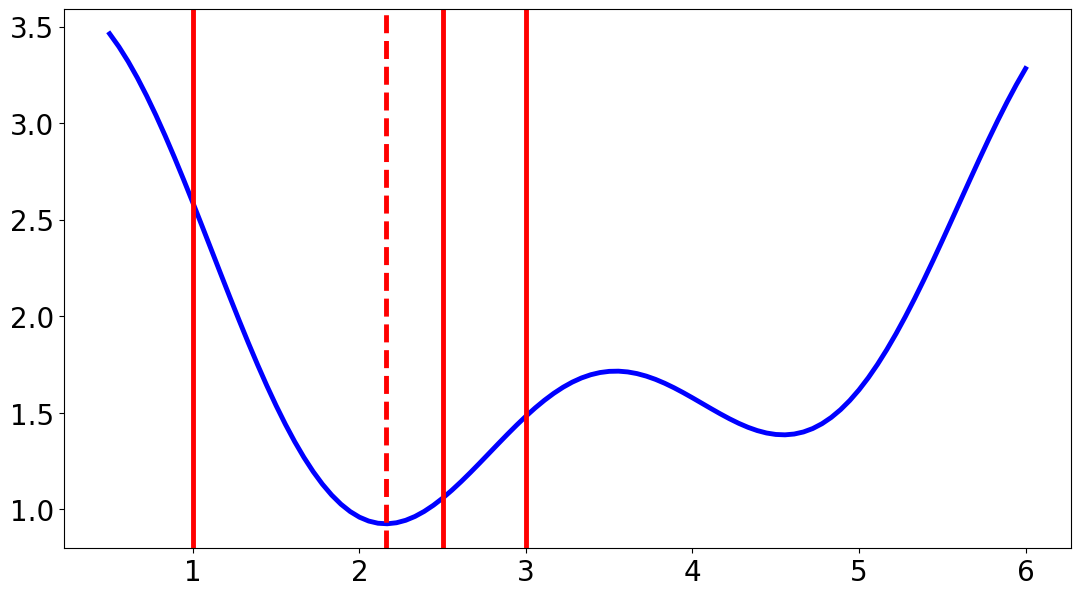

In [9]:
res = optimize.minimize_scalar(f, method='brent')

fig, ax = plt.subplots()
ax.plot(xpoints, f(xpoints), 'b-')
ax.axvline(x=res.x, ymin=0, ymax=3, c='red', ls='--')
ax.axvline(x=1, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=2.5, ymin=0, ymax=3, c='red', ls='-')
ax.axvline(x=3, ymin=0, ymax=3, c='red', ls='-');

**Advantages**
- Always finds a local minimum of any $C^0$ function
- If the function is unimodal, it finds the global minimum
- Handles ill- and well-behaved functions well
- No need to bracket the minimum first

**Disadvantages**
- If minimum is end point, will never return that as the minimum
- Slower than golden section search for very poorly behaved functions

## Standard Value Function Iteration with optimization

Let's go back to *stochastic neoclassical growth model* with $t$ subscripts added:

\begin{gather*}
    \mathbb{V}_t(z,k) = \max_{c,k'} \left\{ u(c) + \beta \mathbb{E} [\mathbb{V}_{t+1}(z',k')|z] \right\} \\
    \text{s.t.} \quad c + k' = z k^{\alpha} + (1-\delta)k, \\
    c>0, k>0
\end{gather*}

We can re-write this problem in terms of only one control variable
\begin{gather*}
    \mathbb{V}_t(z,k) = \max_{k'} \left\{ u(z k^{\alpha} + (1-\delta)k - k') + \beta \mathbb{E} [\mathbb{V}_{t+1}(z',k')|z] \right\} \tag{1}\\
    \text{s.t.} \quad k>0
\end{gather*}

We want to maximize $\mathbb{V}_t(z,k)$

**Step 1. Discounting and expectations** 

Define "end-of-period" value function $W_t$ as
$$
W_t(z,k') \equiv \beta \mathbb{E}[V_{t+1}(z',k')|z],
$$

so that (1) simplifies to 
$$
\mathbb{V}_t(z,k) = \max_{k'} \left\{ u(z k^{\alpha} + (1-\delta)k - k') + W_t(z,k') \right\} \tag{2}
$$

**Step 2. Solve for capital policy using the FOC**

Notice that in the previous step, the RHS of the value function is a function of $k'$ that is unkown.

However, we can *approximate* $W_{k,t}(z,k')$ on the entire domain of $K$ using function approximation. Denote the resulting approximate function as $\tilde{W}_{k,t}(z,k')$.

Then (2) can be written as:
$$
\mathbb{V}_t(z,k) = \max_{k'} \left\{ u(z k^{\alpha} + (1-\delta)k - k') + \tilde{W}_t(z,k') \right\} \tag{3}
$$

So, we want to maximize (3) for every pair $(z,k)$ (one equation, one unkown). Solving this problem gives us the policy function $k_t'(z,k)$.

**Step 3. Calculate consumption and new value function**

Given the calculated capital policy function $k_t'(s,k)$, we can compute the consumption policy function as:
$$
c_t(z,k) = coh_t(z,k) - k_t'(s,k).
$$

The new value function using is the maximizer in (3) $\mathbb{V}_t(z,k)$.

**Step 4. Obtain the steady-state policy functions**

Iterate backward the value function until convergence criterion hit

In [10]:
# Baseline parameters
sigma   = 1
delta   = 1
beta    = 0.97
alpha   = 0.33

# Technology process
rho_z   = 0.95
sigma_z = 0.03
n_z     = 7

# Capital grid
kmin    = 0.01
kmax    = 5
n_k     = 50

In [11]:
# Import functions from the previous lecture
import make_grids

k_grid = make_grids.discretize_capital_exponential(kmin, kmax, n_k)
z_grid, piz, Piz = make_grids.markov_rouwenhorst(rho_z, sigma_z, n_z)

Let's write our `maximize` function using the Brent's method:

In [12]:
def maximize(g, a, b):
    objective = lambda x: -g(x)
    result = optimize.minimize_scalar(objective, bounds=(a, b), method='bounded')
    maximizer, maximum = result.x, -result.fun
    return maximizer, maximum

In [13]:
def value_function(V, Piz, k_grid, z_grid, beta, delta, alpha):
    # Step 1
    W = (beta * Piz) @ V
    
    # Step 2
    coh = z_grid[:, np.newaxis] * k_grid[np.newaxis, :] ** alpha + (1-delta)*k_grid[np.newaxis, :]
    gk = np.empty_like(W)
    Vval = np.empty_like(W)
    for z in range(len(z_grid)):
        for k in range(len(k_grid)):
            if k==0:
                ax = k_grid[0]
            else:
                ax = gk[z,k-1]      # monotonicity
            bx = np.minimum(coh[z,k],k_grid.max())

            def rhs(x):
                cubic_spl = interp1d(k_grid, W[z,:], kind='cubic')
                return np.log(coh[z,k]-x) + cubic_spl(x)
            
            gk[z,k], Vval[z,k] = maximize(rhs,ax,bx)
        
    # Step 3
    gc = coh - gk
    V = Vval
    
    return V, gk, gc

In [14]:
def policy_ss(Piz, k_grid, z_grid, beta, delta, alpha, tol=1E-9):
    # Initial guess for V
    coh = z_grid[:, np.newaxis] * k_grid[np.newaxis, :] ** alpha + (1-delta)*k_grid[np.newaxis, :]
    V = (coh)/(1-beta)
    
    # Iterate until maximum distance between two iterations falls below tol (fail-safe max of 10,000 iterations)
    for it in range(10_000):
        V, gk, gc = value_function(V, Piz, k_grid, z_grid, beta, delta, alpha)
        
        # After iteration 0, can compare new policy function to old one
        if it > 0 and np.max(np.abs(V - V_old)) < tol:
            return V, gk, gc
        
        V_old = V

In [15]:
V, gk, gc = policy_ss(Piz, k_grid, z_grid, beta, delta, alpha)

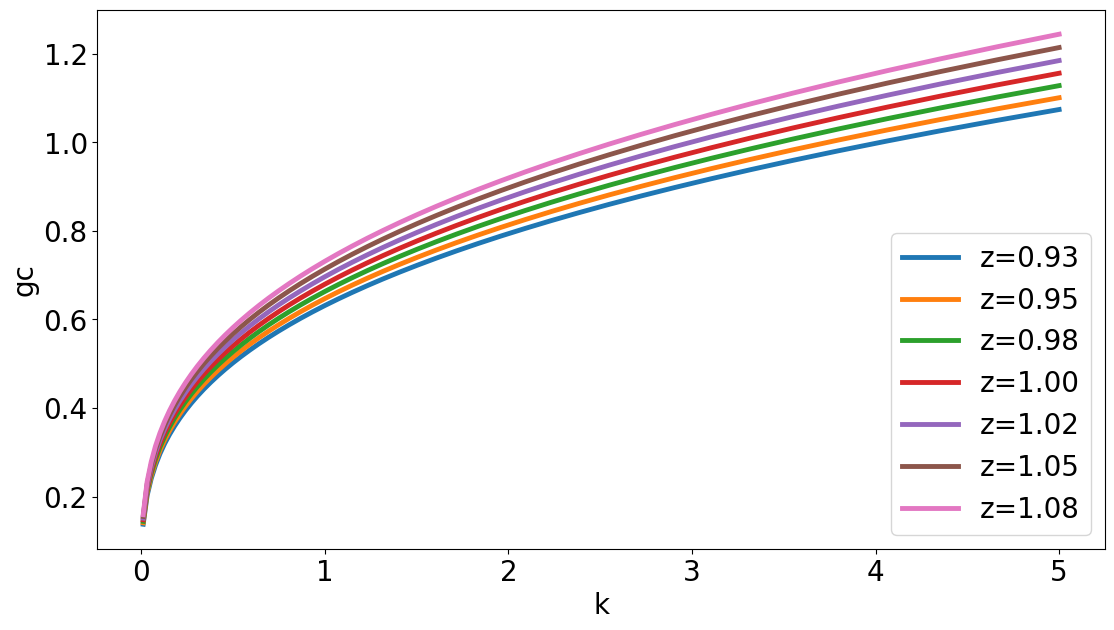

In [16]:
for s, zs in enumerate(z_grid):
    plt.plot(k_grid, gc[s, :], label=f'z={zs:.2f}')
plt.legend()
plt.xlabel('k')
plt.ylabel('gc');

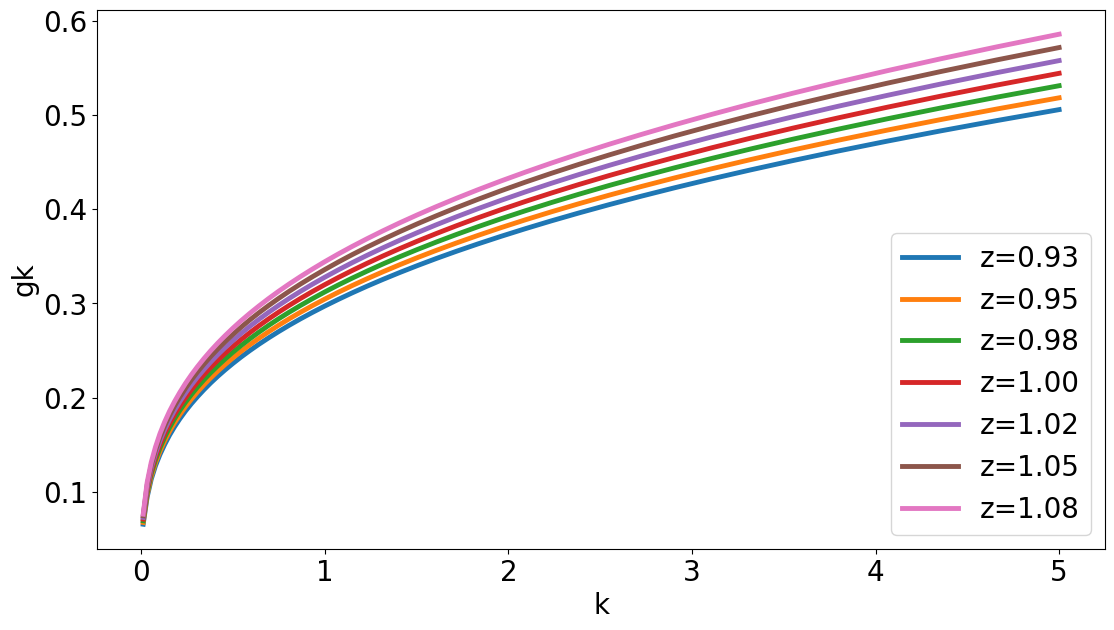

In [17]:
for s, zs in enumerate(z_grid):
    plt.plot(k_grid, gk[s, :], label=f'z={zs:.2f}')
plt.legend()
plt.xlabel('k')
plt.ylabel('gk');

In [18]:
gk_true = alpha * beta * z_grid[:, np.newaxis] * (k_grid[np.newaxis, :] ** alpha)
gc_true = (1 - alpha * beta) * z_grid[:, np.newaxis] * (k_grid[np.newaxis, :] ** alpha)

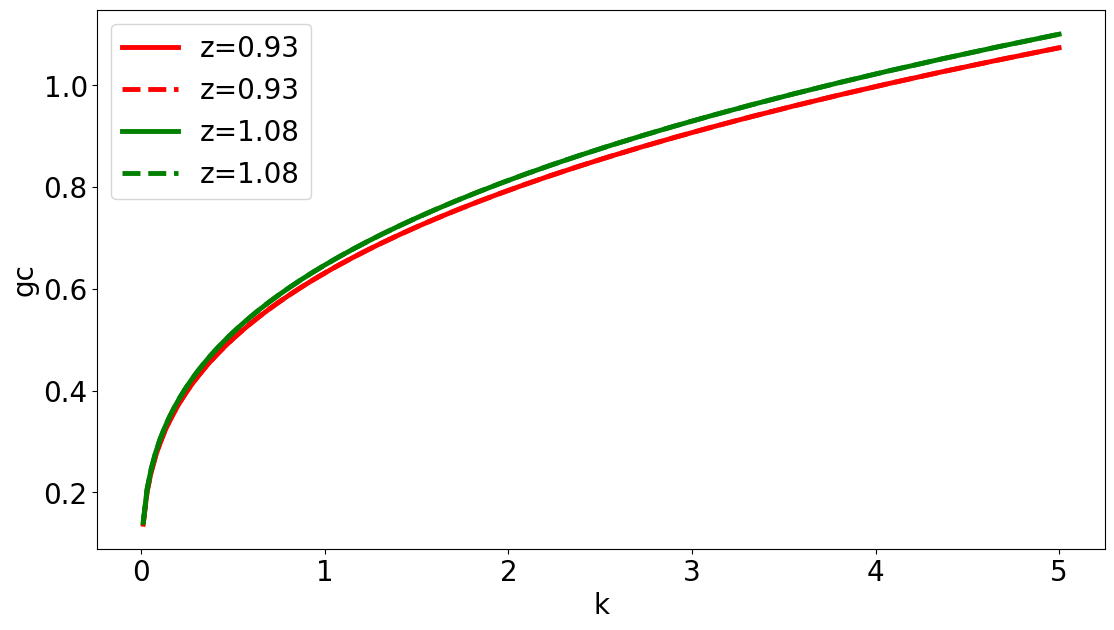

In [19]:
colors = ['r','g']
for s, zs in enumerate(z_grid[0:7:6]):
    plt.plot(k_grid, gc[s, :], label=f'z={zs:.2f}', color = colors[s])
    plt.plot(k_grid, gc_true[s, :], label=f'z={zs:.2f}', linestyle='dashed', color = colors[s])
plt.legend()
plt.xlabel('k')
plt.ylabel('gc');

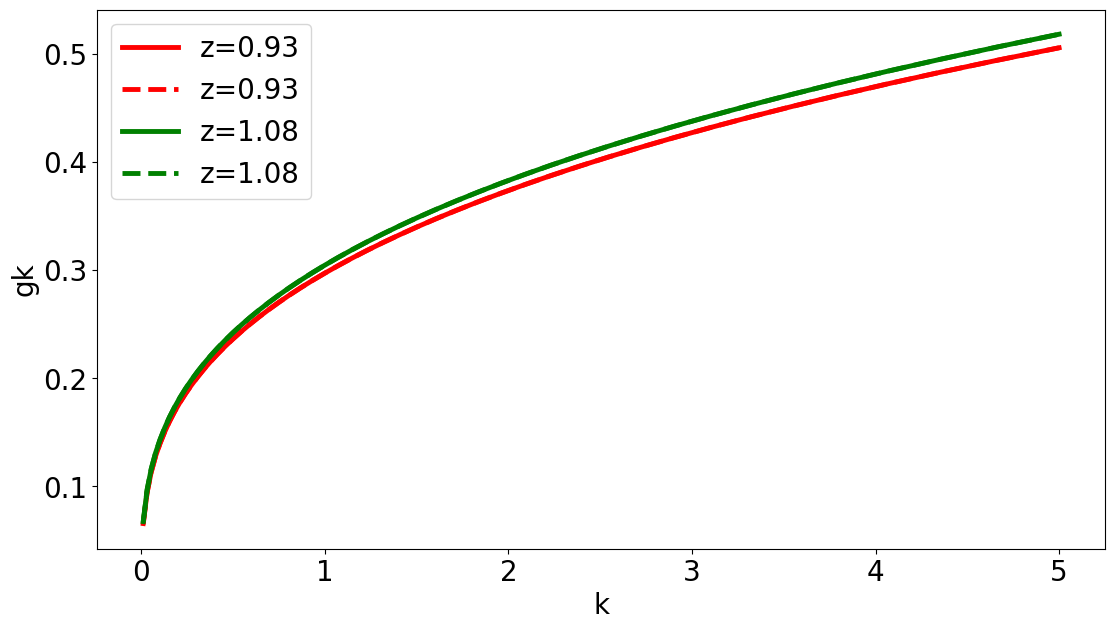

In [20]:
for s, zs in enumerate(z_grid[0:7:6]):
    plt.plot(k_grid, gk[s, :], label=f'z={zs:.2f}', color = colors[s])
    plt.plot(k_grid, gk_true[s, :], label=f'z={zs:.2f}', linestyle='dashed', color = colors[s])
plt.legend()
plt.xlabel('k')
plt.ylabel('gk');

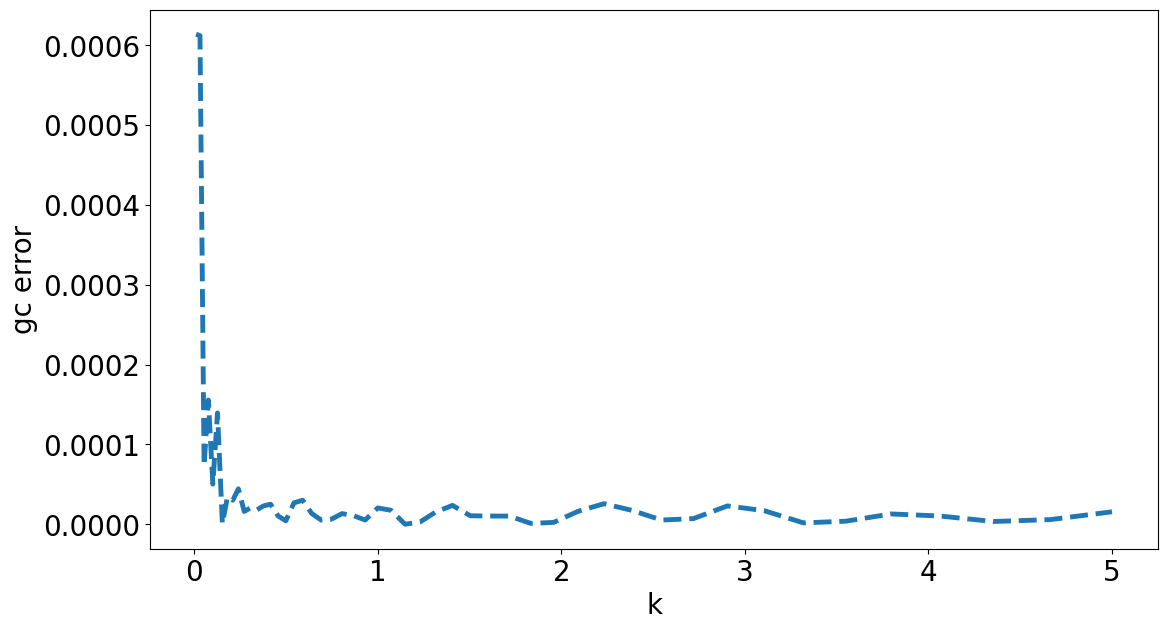

In [21]:
# Consumption policy function error
gc_error = np.abs(gc_true-gc)

for s, zs in enumerate(z_grid[0:1]):
    plt.plot(k_grid, gc_error[s, :], label=f'z={zs:.2f}', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('gc error');

**Advantages**
- Easy to understand.
- It is not complicated to program.
- Helpful in problems where we cannot use the FOCs (they are not sufficient).

**Disadvantages**
- Too slow!
- The maximization step is expensive (calculate it for every pair $(z,k)$)
- We cannot use linear interpolation to approximate the value function